# Solving Ax = 0

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy

## Main idea

Let $A$ be an $m\times n$ matrix.  The solution set of $A{\bf x} = {\bf 0}$ is the intersection of the hyperplanes $\langle {\bf r}_i, {\bf x}\rangle = 0$ for all $i=1,\ldots,m$, where ${\bf r}_i$ is the $i$-th row of $A$.  
Therefore, the solution set of $A$ is a space and we call it the **kernel** $\operatorname{ker}(A)$ of $A$.

Every matrix lead to its **reduced echelon form** after some **row operations**.  If $R$ is the reduced echelon form of $A$, then $A{\bf x} = {\bf 0} = R{\bf x} = {\bf 0}$.

## Side stories

- row operations, reduced echelon form
- SymPy
- trivial or infinite solutions
- kernel (null space)
- row space
- rank + nullity = number of columns

## Experiments

###### Exercise 1
This exercise shows you that the kernel and the row space of a matrix are orthogonal to each other.  
Let  
```python
A = np.array([[1,1,1], 
              [1,1,1]])
```
The **nullity** of $A$ is the dimension of its kernel.  
The **rank** of $A$ is the dimension of its row space.  

###### 1(a)
Use the techniques you learned in Lesson 2 to draw some random points in the kernel of $A$.  
What is the nullity of $A$?

<IPython.core.display.Javascript object>


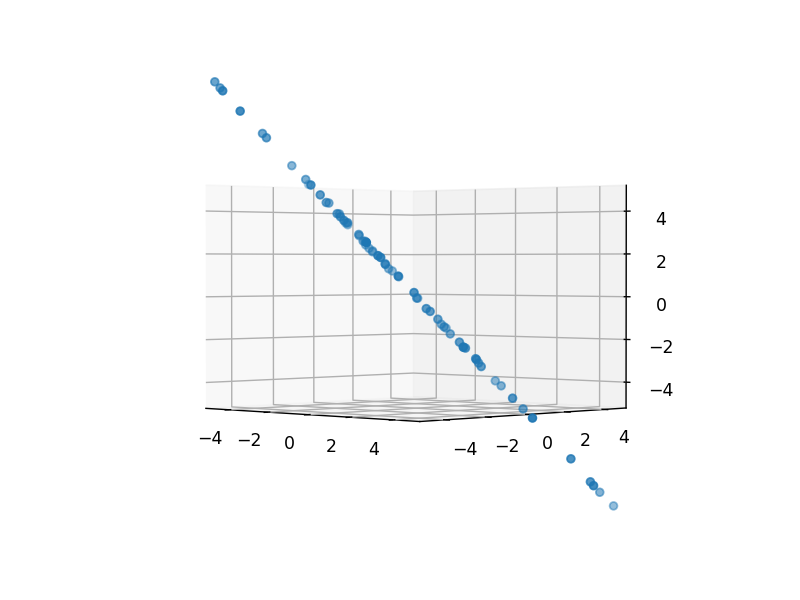

In [12]:
### your answer here
A = np.array([[1,1,1], 
              [1,1,1]])

vs = 5*np.random.randn(3,10000) ### 10000 points in R^3

Avs = A.dot(vs) ### 2 x 3 times 3 x 10000
#mask = (np.abs(Avs).sum(axis = 0) < 0.1)
mask = (np.linalg.norm(Avs, axis = 0) < 0.1)

new_vs = vs[:, mask]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(new_vs[0], new_vs[1], new_vs[2])

###### 1(b)
Use the techniques you learned in Lesson 3 to draw a grid using the rows of $A$.  
What is the rank of $A$?

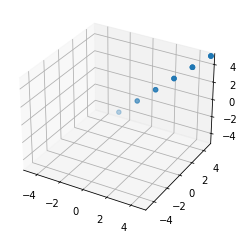

In [146]:
### your answer here
A = np.array([[1,1,1], 
              [1,1,1]])

A = A.T

grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys]) ### 2 x 25
Avs = A.dot(vs) ### 3 x 2 times 2 x 25

# plt.axis('equal')
# plt.scatter(Avs[0], Avs[1])

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Avs[0], Avs[1], Avs[2])

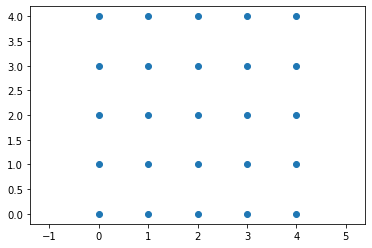

In [63]:
%matplotlib inline
plt.axis('equal')
plt.scatter(xs,ys)

###### 1(c)
Do the same for  
```python
B = np.array([[1,-1,0], 
              [1,0,-1]])
```
What is the nullity and the rank of $B$?

<IPython.core.display.Javascript object>


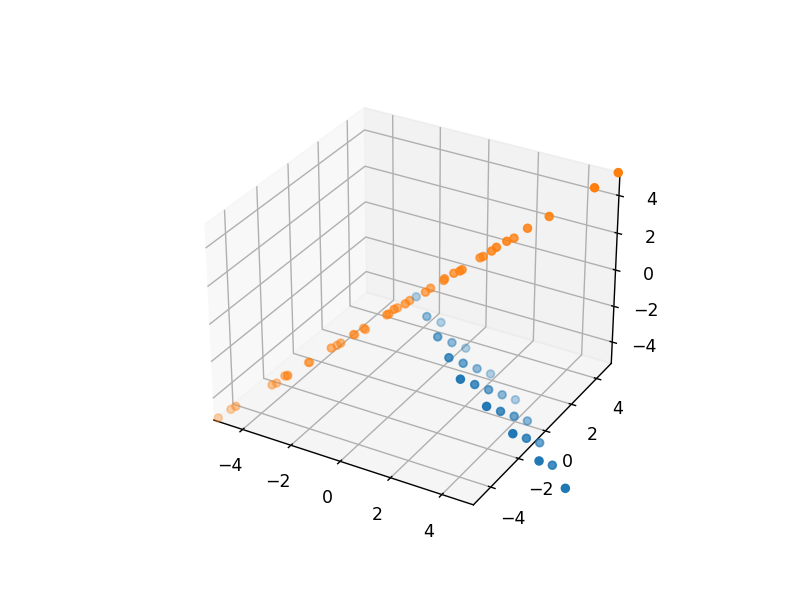

In [3]:
### your answer here
B = np.array([[1,-1,0], 
              [1,0,-1]])

vs = 5*np.random.randn(3,500000) ### 500000 points in R^3
Bvs = B.dot(vs)

mask = (np.abs(Bvs).sum(axis = 0) < 0.1)
new_vs = vs[:, mask]

grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys]) ### 2 x 25
Bvs = B.T.dot(vs) ### 3 x 2 times 2 x 25

get_ipython().run_line_magic('matplotlib', 'notebook')
ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Bvs[0], Bvs[1], Bvs[2])
ax.scatter(new_vs[0], new_vs[1], new_vs[2])

## Exercises

##### Exercise 2
We need to rely on SymPy to do the row operations.  
You may use `sympy.Matrix(arr)` and `np.array(mtx, dtype=float)` to switch between two data types.  
Let
```python
A = sympy.Matrix([[1,1,1,1], 
                  [1,2,2,2], 
                  [1,2,2,3]])
R,pvts = A.rref()
```
Convince your self that $A$ and $R$ have the same kernel.

In [3]:
### your answer here
A = sympy.Matrix([[1,1,1,1],[1,2,2,2],[1,2,2,3]])
R, pvts = A.rref()
print(R,pvts)
print(A.nullspace())
print(R.nullspace())

Matrix([[1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1]]) (0, 1, 3)
[Matrix([
[ 0],
[-1],
[ 1],
[ 0]])]
[Matrix([
[ 0],
[-1],
[ 1],
[ 0]])]


##### Exercise 3
The function `A.rref()` returns the reduced echelon form of $A$ and the indices of the **pivots** --- they are the indices of the first one in each row.  
Find a $3\times 5$ matrix whose pivots are `(1,2,4)` .

In [10]:
### your answer here
A = sympy.Matrix([[0,1,1,1,1], 
                  [0,1,2,2,2], 
                  [0,1,2,2,3]])
R,pvts = A.rref()
R,pvts

(Matrix([
 [0, 1, 0, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1]]),
 (1, 2, 4))

##### Exercise 4
Let  
```python
A = sympy.Matrix([[1,0,2,0,4], 
                  [0,1,3,0,5], 
                  [0,0,0,1,6]])
```
Then $A{\bf x} = {\bf 0}$ is equivalent to 
$$\begin{array}{rrrrrl}
x_0 & ~ & +2x_2 & ~ & +4x_4 & = 0 \\
~ & x_1 & +3x_2 & ~ & +5x_4 & = 0 \\
~ & ~ & ~ & x_3 & +6x_4 & = 0.
\end{array}$$

###### 4(a)
Suppose $x_2 = 1$ and $x_4 = 0$.  Solve the equation by hand.    
Use  
```python
x = sympy.Matrix([x0, x1, x2, x3, x4])
A * x
```
to check your answer.

In [6]:
### your answer here
## By hand: X0=-2, X1=-3, X3=0  
A = sympy.Matrix([[1,0,2,0,4], 
                  [0,1,3,0,5], 
                  [0,0,0,1,6]])

x = sympy.Matrix([-2, -3, 1, 0, 0])
A.dot(x)

[0, 0, 0]

###### 4(b)
Find more solutions by setting $x_2 = s$ and $x_4 = t$.  
Let  
```python
h1,h2 = A.nullspace()
```
Is your answer the same as $s{\bf h}_1 + t{\bf h}_2$?  

In [8]:
### your answer here
h1,h2 = A.nullspace()
print(h1)
print(h2)
A = sympy.Matrix([[1,0,2,0,4], [0,1,3,0,5], [0,0,0,1,6]])
x = sympy.symarray('x', (5,1))
x[2] = "s"
x[4] = "t"
sympy.solve(A * x)
##s= -1/3 * x1 + 5/18 * x3
##t= -1/6 * x3 
##x0= 2/3 * x1 + 1/9 * x3

Matrix([[-2], [-3], [1], [0], [0]])
Matrix([[-4], [-5], [0], [-6], [1]])


{x_0_0: 2*x_1_0/3 + x_3_0/9, t: -x_3_0/6, s: -x_1_0/3 + 5*x_3_0/18}

###### 4(c)
Here is the code for generating ${\bf h}$'s.  
Play with the code and understand the fancy indexing feature in NumPy.
```python
R,pvts = A.rref()

num_cols = A.shape[1]
rank = len(pvts)

R = np.array(R)
pvts = np.array(pvts)
frees = np.array([j for j in range(num_cols) if j not in pvts])

for j in frees:
    h = np.zeros((num_cols,))
    h[j] = 1
    h[pvts] = -R[:rank, j]
    print(h)
```

In [177]:
### your answer here
R,pvts = A.rref()

num_cols = A.shape[1]
rank = len(pvts)

R = np.array(R)
pvts = np.array(pvts)
frees = np.array([j for j in range(num_cols) if j not in pvts])

for j in frees:
    h = np.zeros((num_cols,))
    h[j] = 1
    h[pvts] = -R[:rank, j]
    print(h)

[-2. -3.  1.  0.  0.]
[-4. -5.  0. -6.  1.]


##### 4(d)
Alternatively, you may generate a "null matrix" at once.  
Play with the code and understand the slicing feature in NumPy.
```python
R,pvts = A.rref()

num_cols = A.shape[1]
rank = len(pvts)

R = np.array(R)
pvts = np.array(pvts)
frees = np.array([j for j in range(num_cols) if j not in pvts])

num_frees = frees.shape[0]
hs = np.zeros((num_frees, num_cols))
hs[:, frees] = np.eye(num_frees)
hs[:, pvts] = -R[:rank, frees].T
```

In [178]:
### your answer here
R,pvts = A.rref()

num_cols = A.shape[1]
rank = len(pvts)

R = np.array(R)
pvts = np.array(pvts)
frees = np.array([j for j in range(num_cols) if j not in pvts])

num_frees = frees.shape[0]
hs = np.zeros((num_frees, num_cols))
hs[:, frees] = np.eye(num_frees)
hs[:, pvts] = -R[:rank, frees].T

#### Remark
Let $R$ is a reduced echelon form.  
(Think of Exercise 4.)
The first one in each row = first variable in each equation = a leading variable. (e.g., `(0,1,3)` )  
Other variables = free variables.  (e.g., `(2,4)` )  
By assigning arbitrary numbers to free variables, one may solve the leading variables.  

rank = number of leading variables = number of nonzero rows in $R$  
nullity = number of free variables  

nullity = 0 $\iff$ $\operatorname{ker}(A)$ contains only one trivial ${\bf 0}$  
nullity > 0 $iff$ $\operatorname{ker}(A)$ has infinit solution

#### Dimension theorem
For any $m\times n$ matrix $A$,  
$$\operatorname{rank}(A) + \operatorname{nullity}(A) = n.$$

##### Exercise 5
Let  
```python
A = sympy.Matrix([[1,3,3,18], 
                  [5,15,16,95], 
                  [-5,-15,-15,-90]])
R,pvts = A.rref()
```
Use the same technique as Exercise 4 to solve the kernel of $A$.  
Then verify your answer by `A.nullspace()`.

In [10]:
### your answer here
A = sympy.Matrix([[1,3,3,18],[5,15,16,95],[-5,-15,-15,-90]])
R,pvts = A.rref()
print(R, pvts)
x = sympy.symarray('x', (4,1)) #x0: -3*x1 - 3*x3,  x2: -5*x3
print(sympy.solve(R * x))
print(A.nullspace())

Matrix([[1, 3, 0, 3], [0, 0, 1, 5], [0, 0, 0, 0]]) (0, 2)
{x_2_0: -5*x_3_0, x_0_0: -3*x_1_0 - 3*x_3_0}
[Matrix([
[-3],
[ 1],
[ 0],
[ 0]]), Matrix([
[-3],
[ 0],
[-5],
[ 1]])]


##### Exercise 6
Let  
```python
A = np.array([[1,1,1], 
              [1,1,1]])
A_sym = sympy.Matrix(A)
```
Use the vectors in `A_sym.nullspace()` to draw the grid.  
Check if the space is the same as what you did in Exercise 1.

In [4]:
### your answer here
A = np.array([[1,1,1], 
              [1,1,1]])
A_sym = sympy.Matrix(A)
A_sym.nullspace()

A = sympy.Matrix([[-1,1,0], 
                 [-1,0,1]])
A = A.T

grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = sympy.Matrix([xs,ys]) ### 2 x 25 np.vstack
Avs = np.dot(A,vs) ### 3 x 2 times 2 x 25

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Avs[0], Avs[1], Avs[2], c='red')

<IPython.core.display.Javascript object>

##### Exercise 7
Let  
```python
A = sympy.Matrix([[1,-1,0], 
                 [1,0,-1]])
R,pvts = A.rref()
```
Draw the grid in red using the rows of $A$ and draw the grid in blue using the rows of $R$.  
Are they the same space?


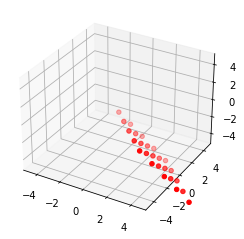

In [163]:
### your answer here
A = sympy.Matrix([[1,-1,0], 
                 [1,0,-1]])
A = A.T

R,pvts = A.rref()

grid = np.meshgrid(np.arange(5), np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = sympy.Matrix([xs,ys]) ### 2 x 25 np.vstack
Avs = np.dot(A,vs) ### 3 x 2 times 2 x 25

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Avs[0], Avs[1], Avs[2], c='red')


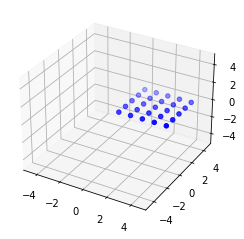

In [164]:
Rvs = np.dot(R,vs) ### 3 x 2 times 2 x 25

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Rvs[0], Rvs[1], Rvs[2], c='blue')